# 🔄 Forex Contrarian Trading System - MEAN REVERSION

Sistema di trading quantitativo basato su **MEAN REVERSION** per 22 coppie valutarie forex.

**Strategia Contrarian:**
- Ribilanciamento settimanale ogni venerdì
- **Long sulle TOP 5 PERDENTI** (momentum negativo)
- **Short sulle TOP 5 VINCITRICI** (momentum positivo)
- Equal weight allocation su 10 posizioni (200% investito)
- **OPPOSTO** della strategia momentum

---

## 📦 Setup e Importazioni

In [1]:
# Importazioni
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Aggiungi percorso moduli
sys.path.append('core')

# Importa moduli core
from data_loader import load_forex_data, get_currency_pairs
from signal_generator import generate_momentum_signals, validate_signals
from backtest_engine import BacktestEngine

# Configurazione matplotlib
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("✅ Setup completato con successo!")

✅ Setup completato con successo!


## 📊 Caricamento Dati e Configurazione

In [2]:
# Carica dati forex
print("🔄 Caricamento dati forex...")
data = load_forex_data('data/forex_synchronized_data.parquet')

# Configurazione strategia - PUOI MODIFICARE QUI IL LOOKBACK
lookback_days = 30  # Modifica questo valore per testare diversi lookback periods

print(f"✅ Lookback selezionato: {lookback_days} giorni")
print(f"📈 Strategia: CONTRARIAN (Mean Reversion)")

🔄 Caricamento dati forex...
✓ Loaded forex data: 4066 days, 88 columns
✓ Date range: 2010-01-01 to 2025-08-01
✅ Lookback selezionato: 30 giorni
📈 Strategia: CONTRARIAN (Mean Reversion)


## 🔄 Generazione Segnali Contrarian

In [3]:
# Genera segnali momentum (che poi invertiremo)
print(f"🔄 Generazione segnali contrarian con lookback {lookback_days} giorni...")
momentum_signals = generate_momentum_signals(
    price_data=data,
    lookback_days=lookback_days,
    top_n=5,  # Top 5 long + top 5 short
    rebalance_freq='weekly'
)

# *** INVERTI I SEGNALI *** 
# Quello che era long diventa short, quello che era short diventa long
contrarian_signals = momentum_signals.copy() * -1  # Inverti tutti i segnali

print(f"\n📊 Confronto Segnali (Momentum vs Contrarian):")
print(f"   • Momentum - Long: {(momentum_signals == 0.2).sum().sum():,}")
print(f"   • Momentum - Short: {(momentum_signals == -0.2).sum().sum():,}")
print(f"   • Contrarian - Long: {(contrarian_signals == 0.2).sum().sum():,}")
print(f"   • Contrarian - Short: {(contrarian_signals == -0.2).sum().sum():,}")

# Statistiche esposizione
daily_exposure_momentum = abs(momentum_signals).sum(axis=1).mean()
daily_exposure_contrarian = abs(contrarian_signals).sum(axis=1).mean()

print(f"\n📈 Esposizione Media Giornaliera:")
print(f"   • Strategia Momentum: {daily_exposure_momentum:.2f} (200% gross)")
print(f"   • Strategia Contrarian: {daily_exposure_contrarian:.2f} (200% gross)")
print(f"\n🔄 CONTRARIAN = Long sui PERDENTI, Short sui VINCITORI")

🔄 Generazione segnali contrarian con lookback 30 giorni...
✓ Generated momentum signals: 30d lookback, 5 long + 5 short
✓ Rebalancing: weekly
✓ Signal range: 2010-01-01 to 2025-08-01

📊 Confronto Segnali (Momentum vs Contrarian):
   • Momentum - Long: 20,330
   • Momentum - Short: 20,330
   • Contrarian - Long: 20,330
   • Contrarian - Short: 20,330

📈 Esposizione Media Giornaliera:
   • Strategia Momentum: 2.00 (200% gross)
   • Strategia Contrarian: 2.00 (200% gross)

🔄 CONTRARIAN = Long sui PERDENTI, Short sui VINCITORI


## 🚀 Backtesting Comparativo

In [4]:
# Backtest strategia MOMENTUM (originale)
print("⚡ Backtest strategia MOMENTUM (originale)...")
engine_momentum = BacktestEngine(initial_capital=100000, leverage=1.0)
start_time = datetime.now()
results_momentum = engine_momentum.run_backtest(data, momentum_signals, verbose=False)
time_momentum = (datetime.now() - start_time).total_seconds()

# Backtest strategia CONTRARIAN (invertita)
print("⚡ Backtest strategia CONTRARIAN (mean reversion)...")
engine_contrarian = BacktestEngine(initial_capital=100000, leverage=1.0)
start_time = datetime.now()
results_contrarian = engine_contrarian.run_backtest(data, contrarian_signals, verbose=False)
time_contrarian = (datetime.now() - start_time).total_seconds()

print(f"\n✅ Backtesting completato!")
print(f"   • Strategia Momentum: {time_momentum:.2f}s")
print(f"   • Strategia Contrarian: {time_contrarian:.2f}s")

INFO:backtest_engine:BacktestEngine initialized with 100,000 starting capital
INFO:backtest_engine:Detected 22 currency pairs
INFO:backtest_engine:Price data range: 2010-01-01 00:00:00 to 2025-08-01 00:00:00
INFO:backtest_engine:Signals data range: 2010-01-01 00:00:00 to 2025-08-01 00:00:00
INFO:backtest_engine:Calculating daily returns...
INFO:backtest_engine:Calculated returns for 22 pairs


⚡ Backtest strategia MOMENTUM (originale)...


INFO:backtest_engine:Calculating performance metrics...
INFO:backtest_engine:BacktestEngine initialized with 100,000 starting capital
INFO:backtest_engine:Detected 22 currency pairs
INFO:backtest_engine:Price data range: 2010-01-01 00:00:00 to 2025-08-01 00:00:00
INFO:backtest_engine:Signals data range: 2010-01-01 00:00:00 to 2025-08-01 00:00:00
INFO:backtest_engine:Calculating daily returns...
INFO:backtest_engine:Calculated returns for 22 pairs


⚡ Backtest strategia CONTRARIAN (mean reversion)...


INFO:backtest_engine:Calculating performance metrics...



✅ Backtesting completato!
   • Strategia Momentum: 3.05s
   • Strategia Contrarian: 0.50s


## 📊 Confronto Performance

In [5]:
# Estrai metriche per confronto
metrics_mom = engine_momentum.performance_metrics
metrics_con = engine_contrarian.performance_metrics

print("="*80)
print(f"📊 CONFRONTO PERFORMANCE - {lookback_days} DAY STRATEGY")
print("="*80)

print(f"\n{'METRICA':<25} {'MOMENTUM':<15} {'CONTRARIAN':<15} {'DIFFERENZA':<15}")
print("-"*75)

# Confronto metriche chiave
metrics_to_compare = [
    ('Total Return (%)', 'Total Return (%)'),
    ('Annualized Return (%)', 'Annualized Return (%)'),
    ('Annualized Volatility (%)', 'Volatilità (%)'),
    ('Sharpe Ratio', 'Sharpe Ratio'),
    ('Maximum Drawdown (%)', 'Max Drawdown (%)'),
    ('Win Rate (%)', 'Win Rate (%)'),
    ('Sortino Ratio', 'Sortino Ratio')
]

for metric_key, display_name in metrics_to_compare:
    mom_val = metrics_mom[metric_key]
    con_val = metrics_con[metric_key]
    diff = con_val - mom_val
    
    print(f"{display_name:<25} {mom_val:<15.2f} {con_val:<15.2f} {diff:<+15.2f}")

print("\n" + "="*80)

# Valori finali portfolio
final_mom = engine_momentum.portfolio_value.iloc[-1]
final_con = engine_contrarian.portfolio_value.iloc[-1]

print(f"\n💰 RISULTATI FINALI:")
print(f"   • Portfolio Momentum: ${final_mom:,.0f}")
print(f"   • Portfolio Contrarian: ${final_con:,.0f}")
print(f"   • Differenza: ${final_con - final_mom:+,.0f}")

if final_con > final_mom:
    print(f"\n🎯 La strategia CONTRARIAN ha performato MEGLIO!")
    improvement = ((final_con / final_mom) - 1) * 100
    print(f"   • Miglioramento: +{improvement:.1f}%")
else:
    print(f"\n📉 La strategia MOMENTUM ha performato meglio.")

📊 CONFRONTO PERFORMANCE - 30 DAY STRATEGY

METRICA                   MOMENTUM        CONTRARIAN      DIFFERENZA     
---------------------------------------------------------------------------
Total Return (%)          -47.11          47.78           +94.90         
Annualized Return (%)     -3.87           2.45            +6.32          
Volatilità (%)            12.36           12.36           +0.00          
Sharpe Ratio              -0.48           0.04            +0.51          
Max Drawdown (%)          54.10           39.02           -15.09         
Win Rate (%)              49.40           50.43           +1.03          
Sortino Ratio             -0.67           0.05            +0.72          


💰 RISULTATI FINALI:
   • Portfolio Momentum: $52,887
   • Portfolio Contrarian: $147,785
   • Differenza: $+94,898

🎯 La strategia CONTRARIAN ha performato MEGLIO!
   • Miglioramento: +179.4%


## 📈 Visualizzazione Comparativa

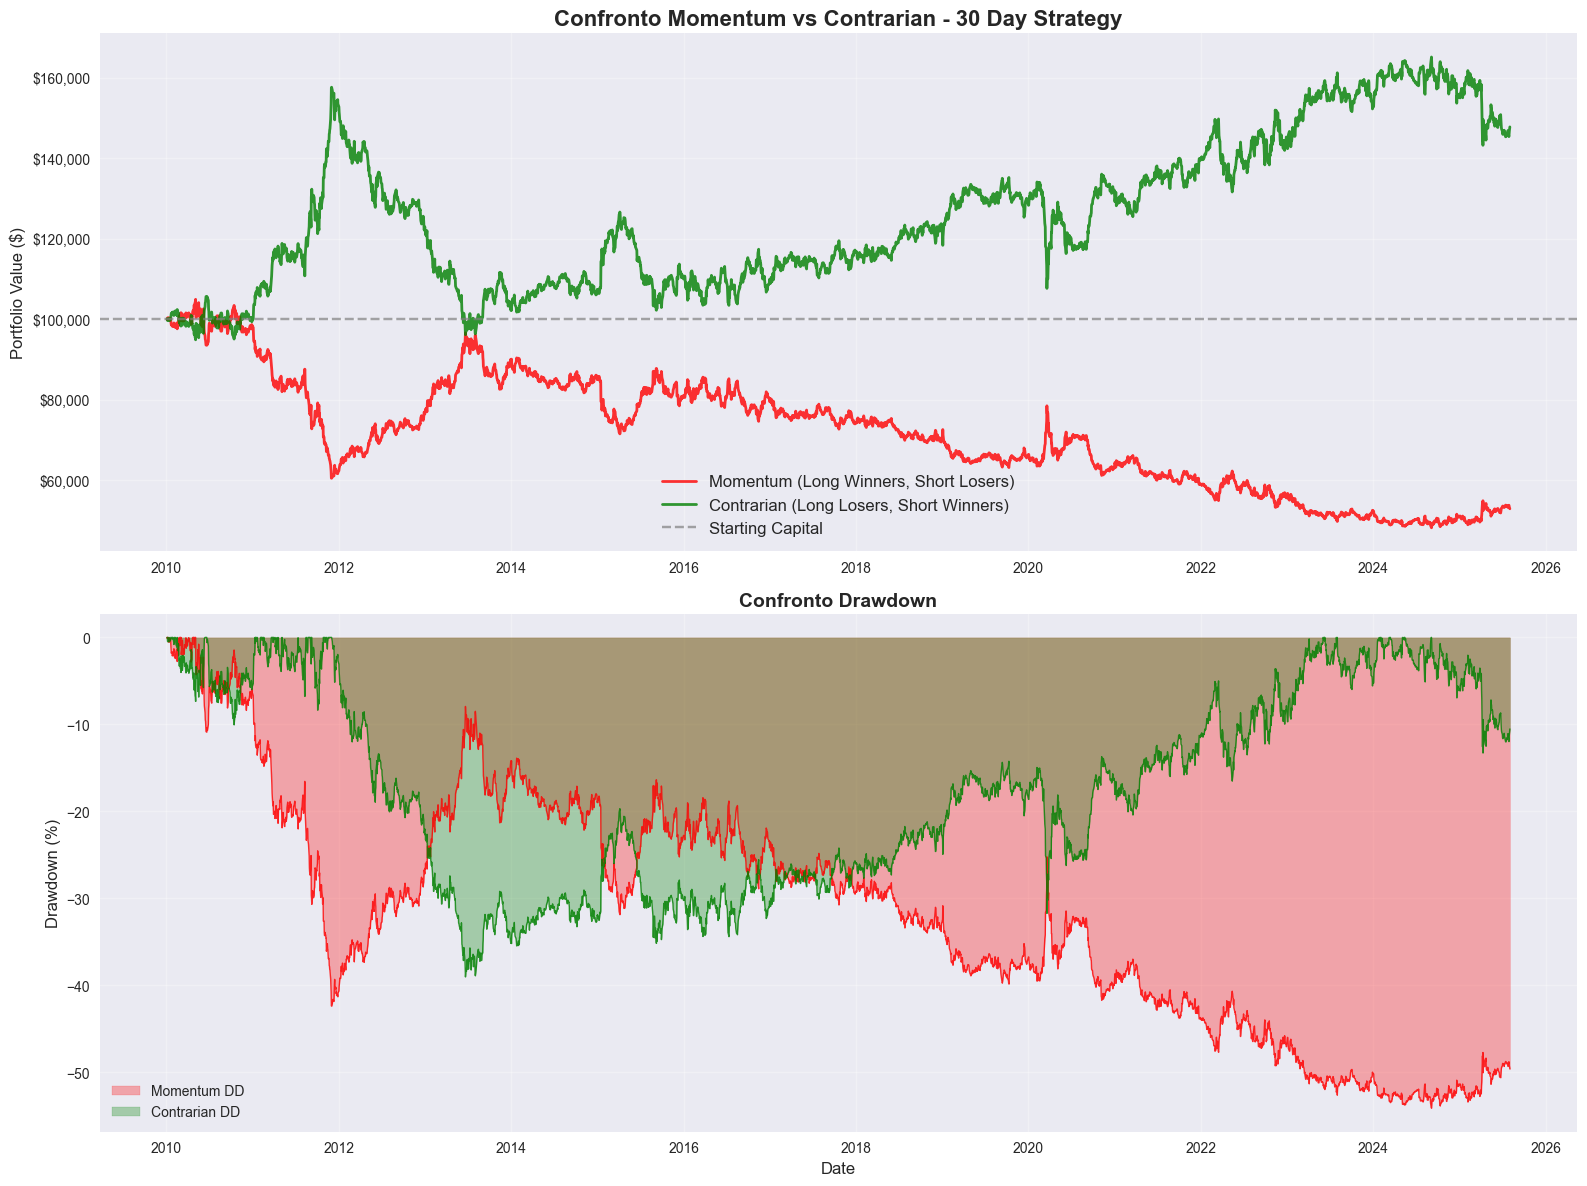

📈 Confronto visivo generato


In [6]:
# 1. EQUITY CURVES COMPARATIVE
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Equity curves
ax1.plot(engine_momentum.portfolio_value.index, engine_momentum.portfolio_value.values, 
         linewidth=2, color='red', label=f'Momentum (Long Winners, Short Losers)', alpha=0.8)
ax1.plot(engine_contrarian.portfolio_value.index, engine_contrarian.portfolio_value.values, 
         linewidth=2, color='green', label=f'Contrarian (Long Losers, Short Winners)', alpha=0.8)
ax1.axhline(y=100000, color='gray', linestyle='--', alpha=0.7, label='Starting Capital')
ax1.set_title(f'Confronto Momentum vs Contrarian - {lookback_days} Day Strategy', fontsize=16, fontweight='bold')
ax1.set_ylabel('Portfolio Value ($)', fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Drawdown comparison
cum_ret_mom = (1 + engine_momentum.portfolio_returns).cumprod()
drawdown_mom = (cum_ret_mom / cum_ret_mom.expanding().max() - 1) * 100

cum_ret_con = (1 + engine_contrarian.portfolio_returns).cumprod()
drawdown_con = (cum_ret_con / cum_ret_con.expanding().max() - 1) * 100

ax2.fill_between(drawdown_mom.index, drawdown_mom.values, 0, alpha=0.3, color='red', label='Momentum DD')
ax2.fill_between(drawdown_con.index, drawdown_con.values, 0, alpha=0.3, color='green', label='Contrarian DD')
ax2.plot(drawdown_mom.index, drawdown_mom.values, color='red', linewidth=1, alpha=0.8)
ax2.plot(drawdown_con.index, drawdown_con.values, color='green', linewidth=1, alpha=0.8)
ax2.set_title('Confronto Drawdown', fontsize=14, fontweight='bold')
ax2.set_ylabel('Drawdown (%)', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📈 Confronto visivo generato")

## 📊 Analisi Rendimenti Rolling

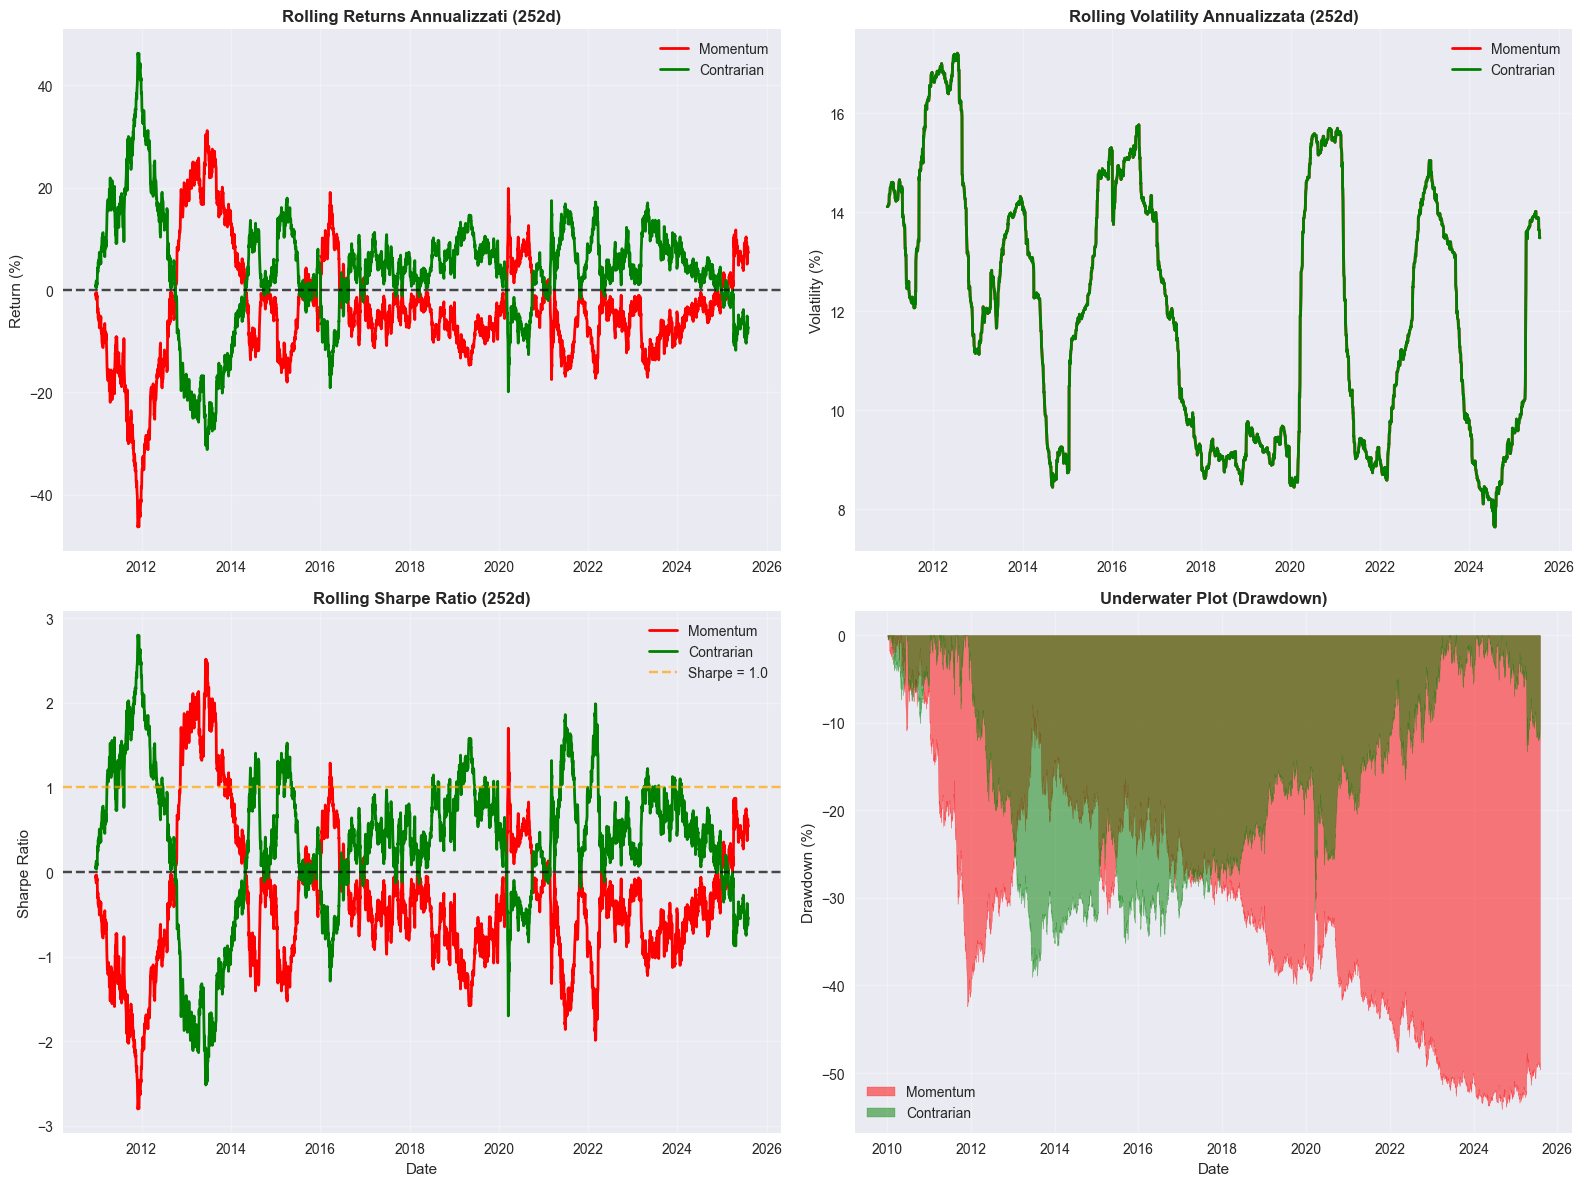

📊 Analisi rolling completata


In [7]:
# Calcola rendimenti rolling annualizzati
window = 252  # 1 anno

mom_rolling_ret = engine_momentum.portfolio_returns.rolling(window).mean() * 252 * 100
con_rolling_ret = engine_contrarian.portfolio_returns.rolling(window).mean() * 252 * 100

mom_rolling_vol = engine_momentum.portfolio_returns.rolling(window).std() * np.sqrt(252) * 100
con_rolling_vol = engine_contrarian.portfolio_returns.rolling(window).std() * np.sqrt(252) * 100

mom_rolling_sharpe = mom_rolling_ret / mom_rolling_vol
con_rolling_sharpe = con_rolling_ret / con_rolling_vol

# Visualizzazione
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Rolling Returns
ax1.plot(mom_rolling_ret.index, mom_rolling_ret.values, color='red', label='Momentum', linewidth=2)
ax1.plot(con_rolling_ret.index, con_rolling_ret.values, color='green', label='Contrarian', linewidth=2)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.7)
ax1.set_title('Rolling Returns Annualizzati (252d)', fontweight='bold')
ax1.set_ylabel('Return (%)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Rolling Volatility
ax2.plot(mom_rolling_vol.index, mom_rolling_vol.values, color='red', label='Momentum', linewidth=2)
ax2.plot(con_rolling_vol.index, con_rolling_vol.values, color='green', label='Contrarian', linewidth=2)
ax2.set_title('Rolling Volatility Annualizzata (252d)', fontweight='bold')
ax2.set_ylabel('Volatility (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Rolling Sharpe
ax3.plot(mom_rolling_sharpe.index, mom_rolling_sharpe.values, color='red', label='Momentum', linewidth=2)
ax3.plot(con_rolling_sharpe.index, con_rolling_sharpe.values, color='green', label='Contrarian', linewidth=2)
ax3.axhline(y=0, color='black', linestyle='--', alpha=0.7)
ax3.axhline(y=1, color='orange', linestyle='--', alpha=0.7, label='Sharpe = 1.0')
ax3.set_title('Rolling Sharpe Ratio (252d)', fontweight='bold')
ax3.set_ylabel('Sharpe Ratio')
ax3.set_xlabel('Date')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Underwater plot (drawdown)
ax4.fill_between(drawdown_mom.index, drawdown_mom.values, 0, alpha=0.5, color='red', label='Momentum')
ax4.fill_between(drawdown_con.index, drawdown_con.values, 0, alpha=0.5, color='green', label='Contrarian')
ax4.set_title('Underwater Plot (Drawdown)', fontweight='bold')
ax4.set_ylabel('Drawdown (%)')
ax4.set_xlabel('Date')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Analisi rolling completata")

## 💾 Salvataggio Risultati

In [8]:
# Salva risultati comparativi
comparison_file = f'momentum_vs_contrarian_{lookback_days}d.csv'

comparison_df = pd.DataFrame({
    'Date': engine_momentum.portfolio_value.index,
    'Momentum_Value': engine_momentum.portfolio_value.values,
    'Momentum_Return': engine_momentum.portfolio_returns.values,
    'Contrarian_Value': engine_contrarian.portfolio_value.values,
    'Contrarian_Return': engine_contrarian.portfolio_returns.values,
    'Momentum_DD': drawdown_mom.values,
    'Contrarian_DD': drawdown_con.values
})

comparison_df.to_csv(comparison_file, index=False)
print(f"💾 Confronto salvato in: {comparison_file}")

# Riepilogo finale
print(f"\n🎯 CONCLUSIONI ANALISI {lookback_days}-DAY CONTRARIAN:")
print(f"   • Strategia Contrarian = OPPOSTO del momentum")
print(f"   • Long sui PERDENTI, Short sui VINCITORI")
if final_con > final_mom:
    print(f"   • ✅ CONTRARIAN supera MOMENTUM di {((final_con/final_mom)-1)*100:.1f}%")
    print(f"   • 🎯 Conferma: FOREX è MEAN REVERTING!")
else:
    print(f"   • ❌ MOMENTUM supera CONTRARIAN")
    
print(f"   • Sharpe Contrarian: {metrics_con['Sharpe Ratio']:.3f} vs Momentum: {metrics_mom['Sharpe Ratio']:.3f}")
print(f"   • DD Contrarian: {metrics_con['Maximum Drawdown (%)']:.1f}% vs Momentum: {metrics_mom['Maximum Drawdown (%)']:.1f}%")

print(f"\n✅ Analisi Contrarian vs Momentum completata!")

💾 Confronto salvato in: momentum_vs_contrarian_30d.csv

🎯 CONCLUSIONI ANALISI 30-DAY CONTRARIAN:
   • Strategia Contrarian = OPPOSTO del momentum
   • Long sui PERDENTI, Short sui VINCITORI
   • ✅ CONTRARIAN supera MOMENTUM di 179.4%
   • 🎯 Conferma: FOREX è MEAN REVERTING!
   • Sharpe Contrarian: 0.036 vs Momentum: -0.475
   • DD Contrarian: 39.0% vs Momentum: 54.1%

✅ Analisi Contrarian vs Momentum completata!
